# Bias-variance trade off

First a look at OLS and bias-variance trade off. 

Imports

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import (
    PolynomialFeatures,
)
from sklearn.utils import resample
from new.functions import runge, MSE, R2, OLS_parameters

Bias-variance trade off without resampling

In [38]:
# number of datapoints and bootstraps
n = 100
bootstraps = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

# splitting into test and training data and keeeping the test data consistent throughout the whole analysis
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_offset = y_train.mean()

biases = []
variances = []
mses = []
degrees = range(1,11)

# looping over polynomial degrees
for p in degrees:
    predictions = np.empty((y_test.shape[0], bootstraps))
    targets = np.empty((y_test.shape[0], bootstraps))
    
    # polynomial features and scaling
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()

    # looping over the number og bootstraps
    for b in range(bootstraps):
        x_,y_ = resample(x_train, y_train)

        # design matrix
        X_train = poly.fit_transform(x_)
        X_test = poly.fit_transform(x_test)

        # scaling the design matrix
        scaler.fit(X_train)
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        # OLS
        beta = OLS_parameters(X_train_s, y_)
        y_test_tilde = X_test_s @ beta + y_offset 
        y_train_tilde = X_train_s @ beta + y_offset
        predictions[:,b] = y_test_tilde.ravel()

    # finding the bias, variance and MSE for each polynomial degree
    biases.append(np.mean( (y_test - np.mean(predictions, axis=1, keepdims=True))**2 ))
    variances.append(np.mean( np.var(predictions, axis=1, keepdims=True) ))
    mses.append(MSE(y_test, predictions))

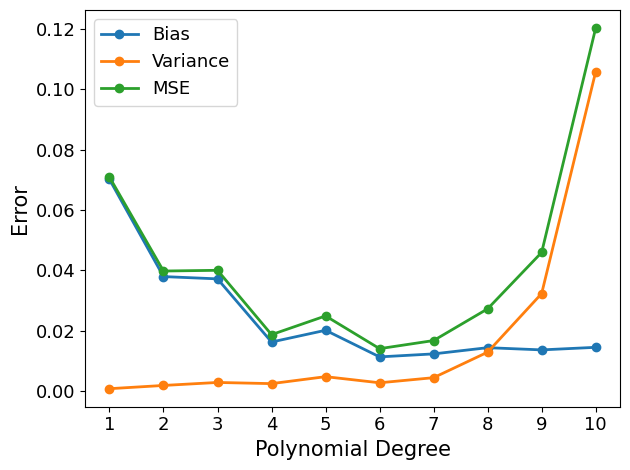

In [39]:
# plotting
plt.plot(degrees,biases, label='Bias', marker='o', linewidth=2)
plt.plot(degrees, variances, label='Variance', marker='o', linewidth=2)
plt.plot(degrees, mses, label='MSE', marker='o', linewidth=2)
# plt.yscale('log')
plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("../Figures/bias_variance_n100.png", dpi=300, bbox_inches='tight')
plt.show()

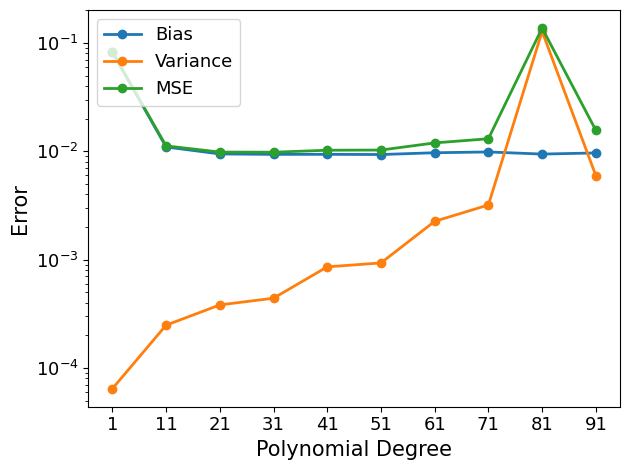

In [34]:
# plotting
plt.plot(degrees,biases, label='Bias', marker='o', linewidth=2)
plt.plot(degrees, variances, label='Variance', marker='o', linewidth=2)
plt.plot(degrees, mses, label='MSE', marker='o', linewidth=2)
plt.yscale('log')
plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("../Figures/bias_variance_n1000.png", dpi=300, bbox_inches='tight')
plt.show()